<a href="https://colab.research.google.com/github/shantanu0603/Analysis-of-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease/blob/main/Analyse_Health_and_Demographic_Data_to_identify_common_traits_leading_to_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# prompt: import a csv file from my drive and clean and process it

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path ='/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015 2 (1).csv'

try:
  df = pd.read_csv(file_path)

  # Example cleaning and processing steps:
  # 1. Remove rows with missing values
  df.dropna(inplace=True)

  # 3. Remove duplicates
  df.drop_duplicates(inplace=True)

  print("DataFrame after cleaning and processing:")
  print(df.head())

except FileNotFoundError:
  print(f"File not found at: {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame after cleaning and processing:
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...             

**UNIVARIATE ANALYSIS**

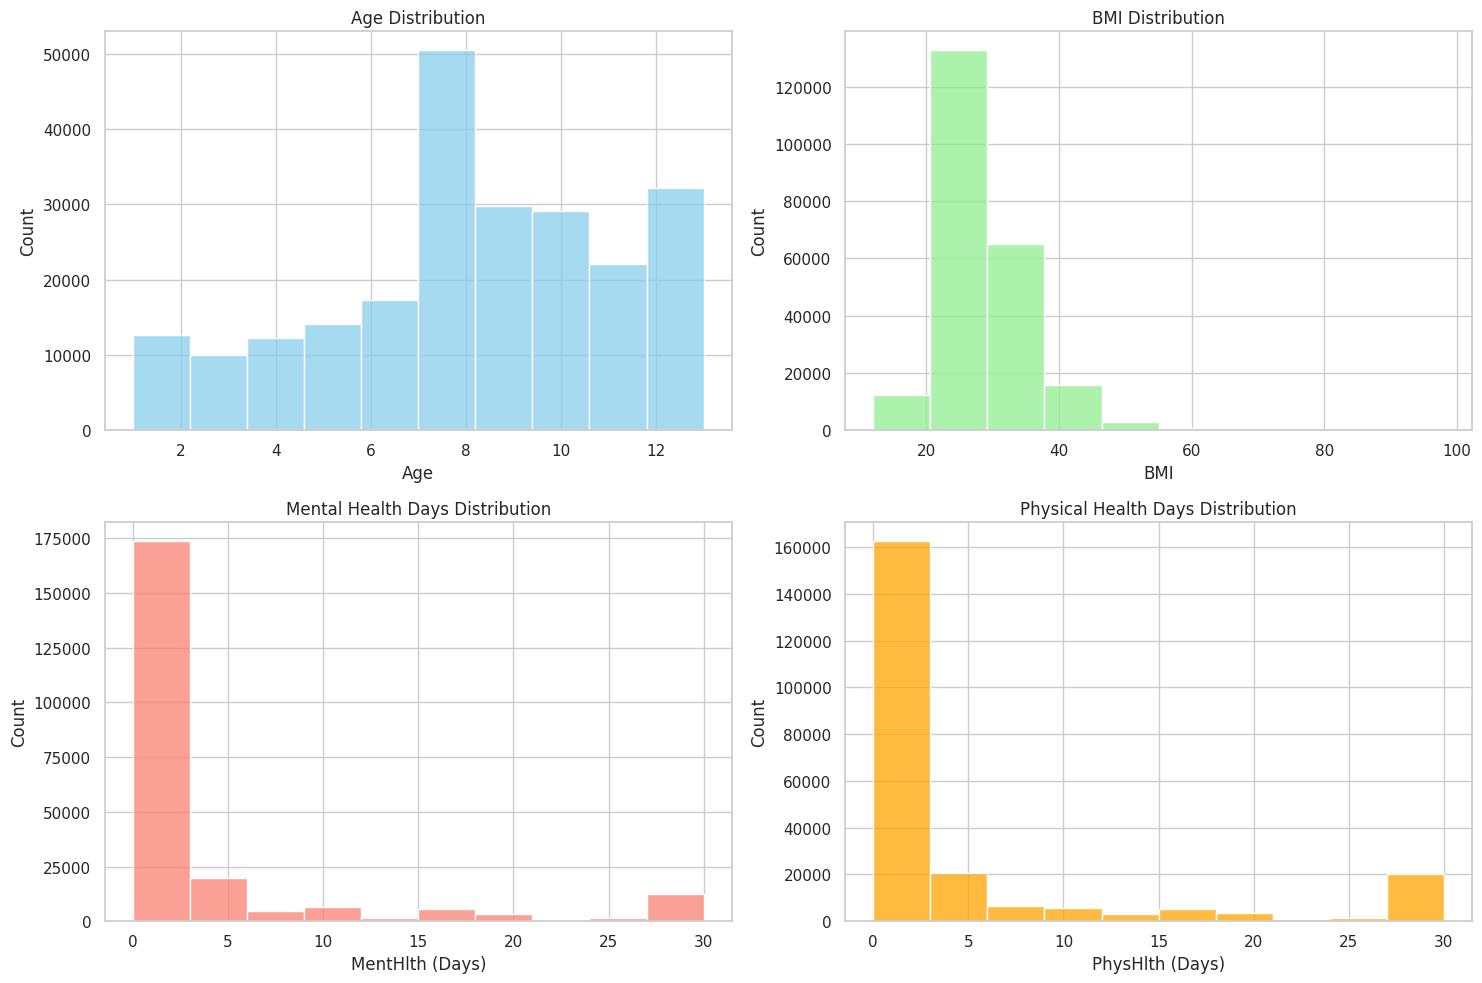

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the general style for the plots
sns.set(style="whitegrid")

# Plotting histograms for Age, BMI, MentHlth, PhysHlth
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age histogram
sns.histplot(df['Age'], bins=10, kde=False, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# BMI histogram
sns.histplot(df['BMI'], bins=10, kde=False, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Count')

# Mental health days histogram
sns.histplot(df['MentHlth'], bins=10, kde=False, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Mental Health Days Distribution')
axes[1, 0].set_xlabel('MentHlth (Days)')
axes[1, 0].set_ylabel('Count')

# Physical health days histogram
sns.histplot(df['PhysHlth'], bins=10, kde=False, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Physical Health Days Distribution')
axes[1, 1].set_xlabel('PhysHlth (Days)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#The histogram for Age shows a skewed distribution with more individuals in the older age groups (especially around 60-80 years).
#There are fewer individuals in the younger age brackets (below 40 years).
#The BMI histogram displays a nearly normal distribution centered around a BMI of 27-30.
#There are fewer people with very low or very high BMI values. Most individuals fall within the "overweight" to "obese" range based on BMI categories.
#the majority of individuals reported 0 to 5 days of poor mental health in the past month, as shown in the MentHlth histogram.
#A significant portion of the population did not experience any mental health issues (0 days).
#A smaller subset of the population experienced more than 20 days of poor mental health.
#Similarly, the PhysHlth histogram shows that many individuals report between 0 to 5 days of poor physical health.
#There is a smaller group of people reporting more than 15-20 days of poor physical health.

**Investigate Prevalence of Health Conditions:**

<ipython-input-10-ed758ba6ba98>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighBP', data=df, palette='Blues', ax=axes[0]) # Changed df to data
<ipython-input-10-ed758ba6ba98>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighChol', data=df, palette='Greens', ax=axes[1]) # Changed df to data


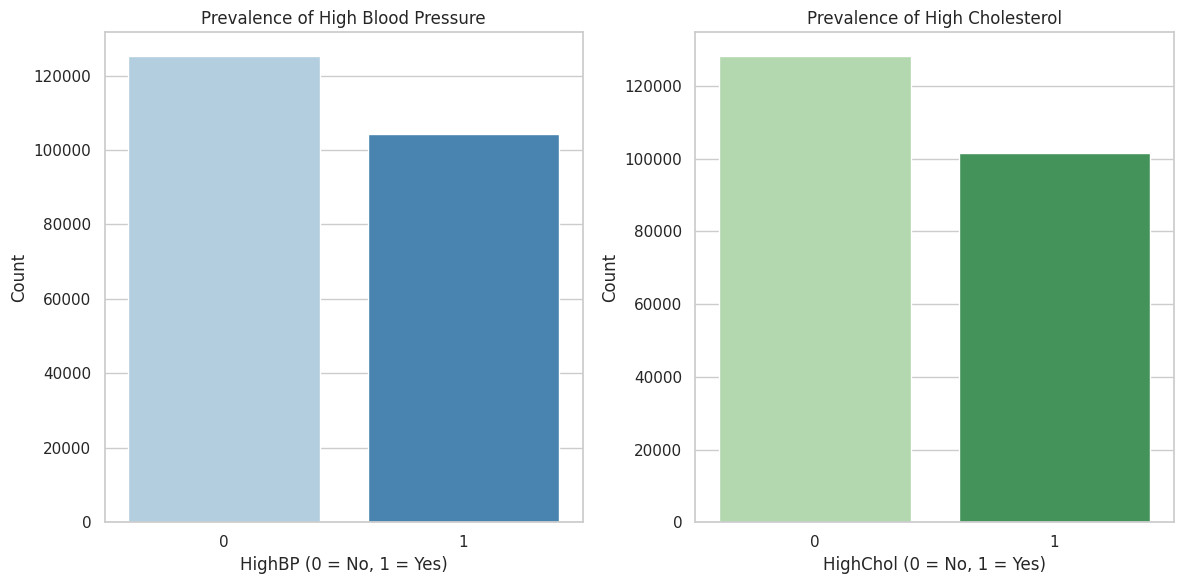

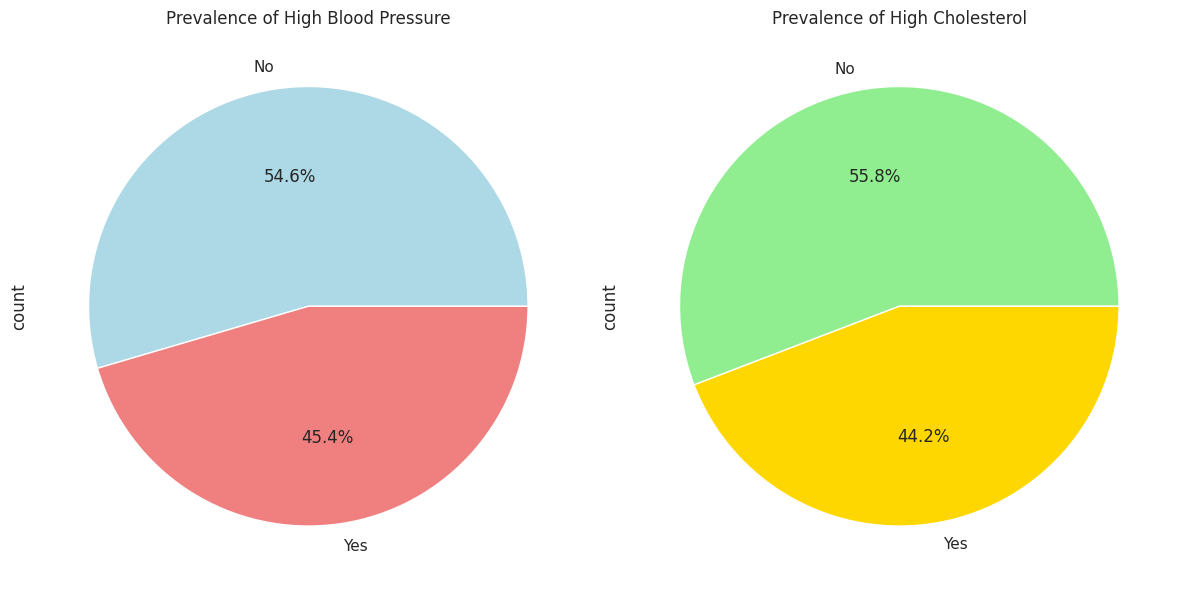

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the general style for the plots
sns.set(style="whitegrid")

# Plotting bar charts for HighBP and HighChol
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# HighBP bar chart
sns.countplot(x='HighBP', data=df, palette='Blues', ax=axes[0]) # Changed df to data
axes[0].set_title('Prevalence of High Blood Pressure')
axes[0].set_xlabel('HighBP (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# HighChol bar chart
sns.countplot(x='HighChol', data=df, palette='Greens', ax=axes[1]) # Changed df to data
axes[1].set_title('Prevalence of High Cholesterol')
axes[1].set_xlabel('HighChol (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# You can alternatively use pie charts to display the same:
labels = ['No', 'Yes']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for HighBP
df['HighBP'].value_counts().plot.pie(autopct='%1.1f%%', labels=labels, colors=['lightblue', 'lightcoral'], ax=axes[0]) # Changed data to df
axes[0].set_title('Prevalence of High Blood Pressure')

# Pie chart for HighChol
df['HighChol'].value_counts().plot.pie(autopct='%1.1f%%', labels=labels, colors=['lightgreen', 'gold'], ax=axes[1]) # Changed data to df
axes[1].set_title('Prevalence of High Cholesterol')

plt.tight_layout()
plt.show()

#Prevalence of High Blood Pressure (HighBP):

#The first bar chart represents the count of people with and without high blood pressure.
#0 (No high blood pressure) has a higher count, exceeding 120,000 individuals.
#1 (Yes high blood pressure) has a lower count, though still significant, slightly below 110,000 individuals.
#Overall, there are more individuals without high blood pressure compared to those with it.
#Prevalence of High Cholesterol (HighChol):

#The second bar chart depicts the count of people with and without high cholesterol.
#0 (No high cholesterol) is the majority group, with a count just above 120,000.
#1 (Yes high cholesterol) is lower, with a count under 110,000.
#Similar to high blood pressure, more people do not have high cholesterol compared to those who do.



**Analyze Distribution of Heart Disease (Target Variable):**

<ipython-input-11-739b9747c02b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Reds')


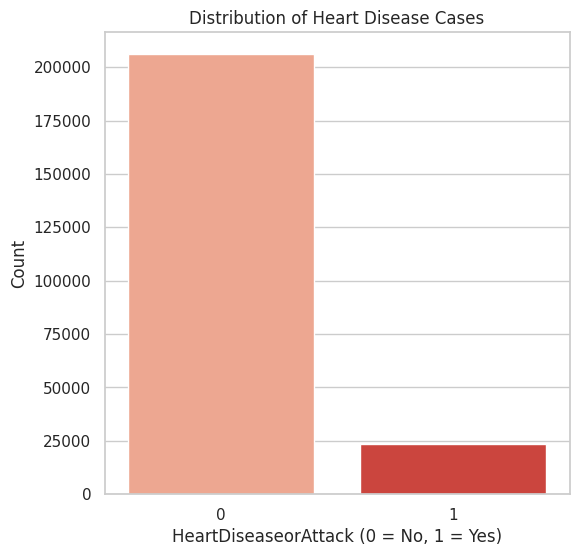

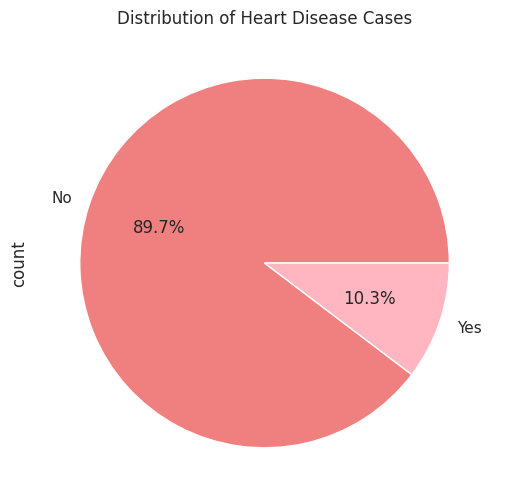

In [11]:
# Bar chart for HeartDiseaseorAttack
plt.figure(figsize=(6, 6))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Reds')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('HeartDiseaseorAttack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Pie chart for HeartDiseaseorAttack
plt.figure(figsize=(6, 6))
df['HeartDiseaseorAttack'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['lightcoral', 'lightpink'])
plt.title('Distribution of Heart Disease Cases')
plt.show()


#Majority without Heart Disease/Attack:

#The count for individuals without heart disease or a heart attack (0) is significantly higher, around 200,000. This suggests that the majority of individuals in the dataset do not suffer from heart disease or have not experienced a heart attack.
#Minority with Heart Disease/Attack:

#The number of individuals with heart disease or heart attack (1) is much lower, approximately 25,000. This shows that a smaller proportion of the population in the dataset has heart disease or has experienced a heart attack.
#Significant Imbalance:

#There is a considerable imbalance between the two groups. The prevalence of heart disease/attack is much lower, indicating that it affects a smaller portion of the dataset's population.
#Heart Disease/Attack Proportion:

#The proportion of individuals with heart disease or a heart attack is roughly 12% of the population, based on visual comparison. This suggests that while present, heart disease/attack is not the predominant condition in the dataset.
#Potential Public Health Implications:

#The large difference between the two groups could indicate successful preventive measures or the need to analyze further why a smaller subset suffers from heart conditions, possibly focusing on risk factors or healthcare interventions.

**BIVARIATE ANALYSIS**

**Explore Relationships with Heart Disease:**

<ipython-input-12-b32fcc0baa26>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df, palette='Reds', ax=axes[2])


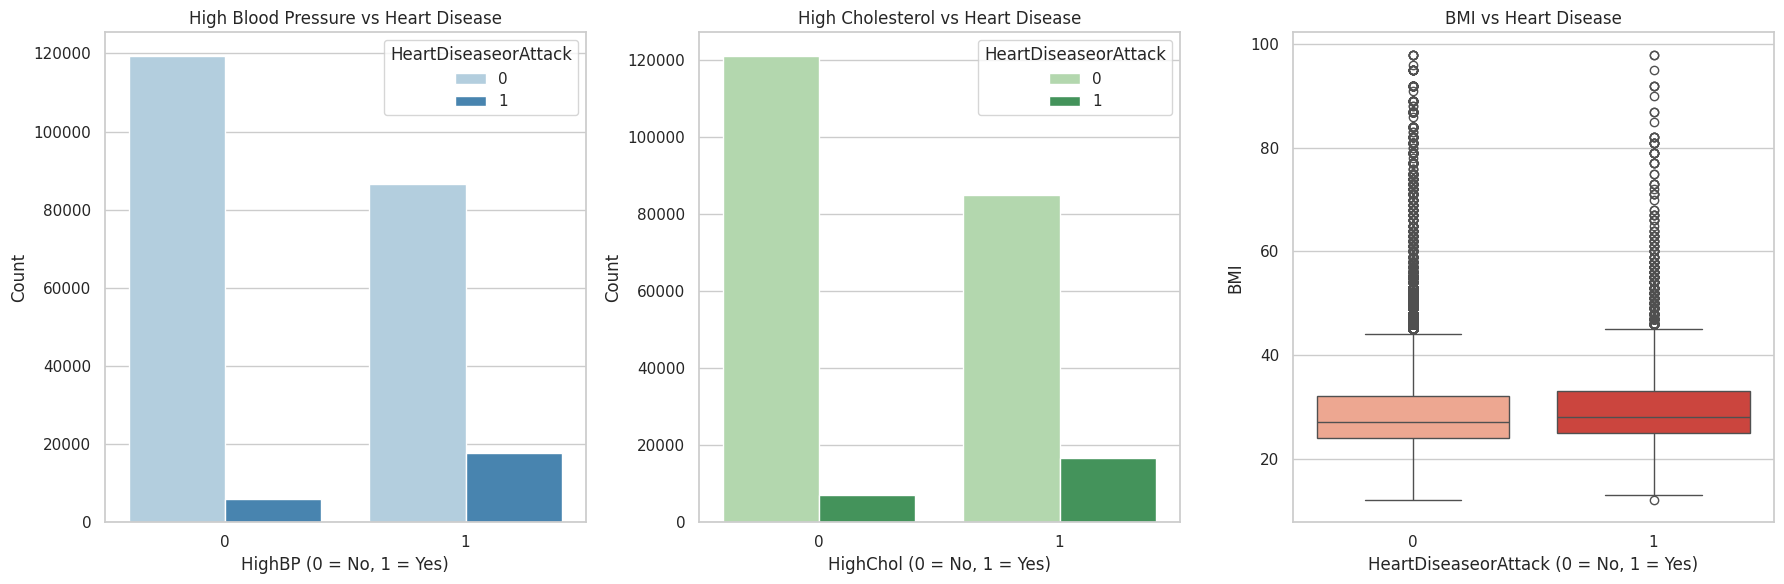

In [12]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compare HighBP, HighChol, and BMI with HeartDiseaseorAttack
# Markdown: Comparing key health conditions like HighBP, HighChol, and BMI for individuals with and without heart disease.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# HighBP vs Heart Disease
sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=df, palette='Blues', ax=axes[0])
axes[0].set_title('High Blood Pressure vs Heart Disease')
axes[0].set_xlabel('HighBP (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# HighChol vs Heart Disease
sns.countplot(x='HighChol', hue='HeartDiseaseorAttack', data=df, palette='Greens', ax=axes[1])
axes[1].set_title('High Cholesterol vs Heart Disease')
axes[1].set_xlabel('HighChol (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')

# BMI vs Heart Disease
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df, palette='Reds', ax=axes[2])
axes[2].set_title('BMI vs Heart Disease')
axes[2].set_xlabel('HeartDiseaseorAttack (0 = No, 1 = Yes)')
axes[2].set_ylabel('BMI')

plt.tight_layout()
plt.show()

# Findings:
# The plots reveal that individuals with high blood pressure or high cholesterol are more likely to have heart disease.
# There is also a clear relationship between higher BMI and the presence of heart disease.


**Visualize Correlations Between Variables:**

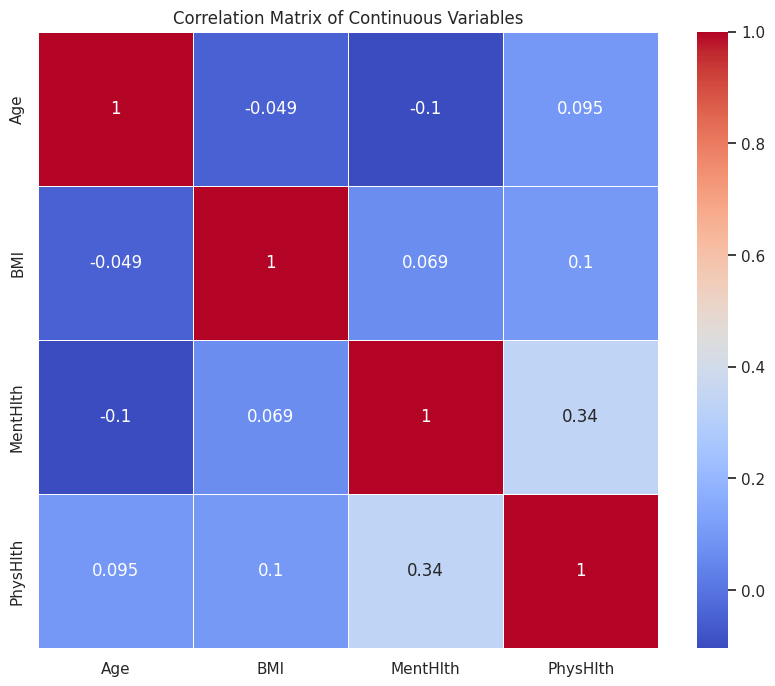

In [13]:
# Markdown: Visualizing the correlations between key continuous variables using a correlation matrix.
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'BMI', 'MentHlth', 'PhysHlth']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

# Findings:
# - Age and BMI show little correlation with other variables.
# - Mental and physical health days are moderately correlated with each other.


**Compare Heart Disease Across Demographic Groups:**

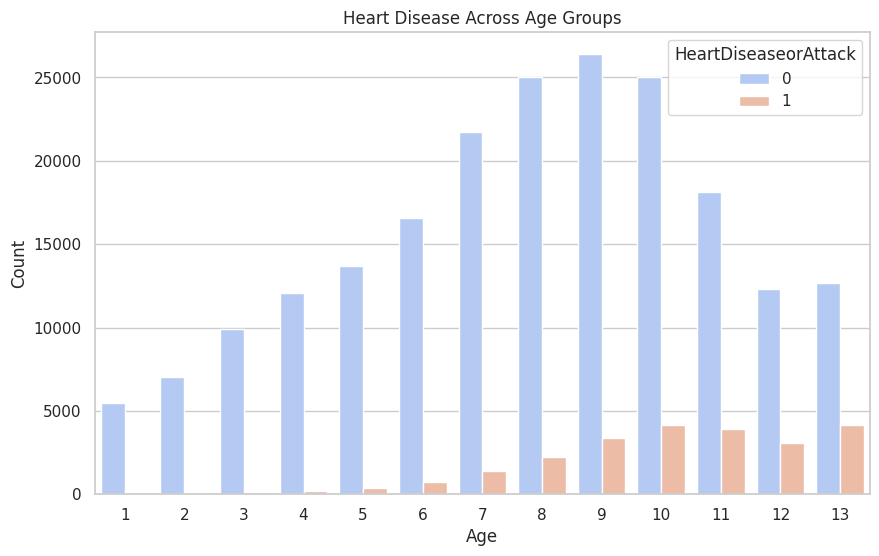

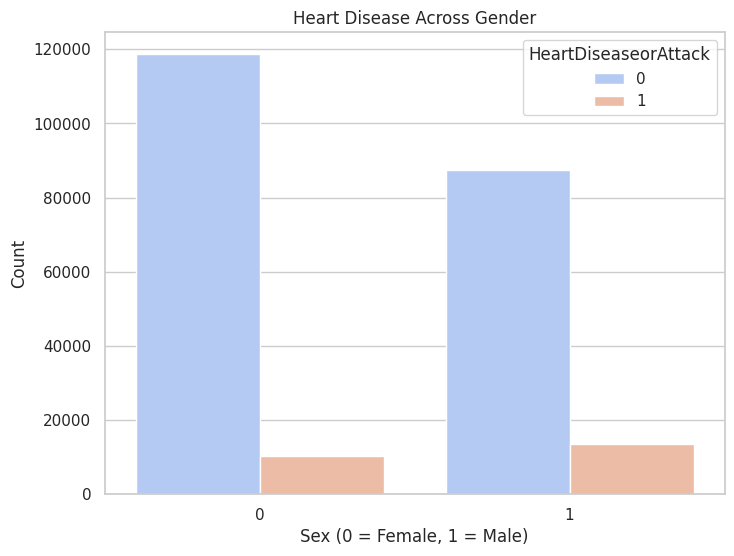

In [14]:
# Markdown: Analyze the prevalence of heart disease across different age groups and gender.

# Heart Disease across Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='HeartDiseaseorAttack', data=df, palette='coolwarm')
plt.title('Heart Disease Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Findings:
# The plot shows that heart disease prevalence increases with age, especially in individuals aged 60 and above.

# Heart Disease across Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df, palette='coolwarm')
plt.title('Heart Disease Across Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

# Findings:
# The plot reveals that males have a higher prevalence of heart disease compared to females.


<ipython-input-15-e7da05fd6d86>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette=palette)


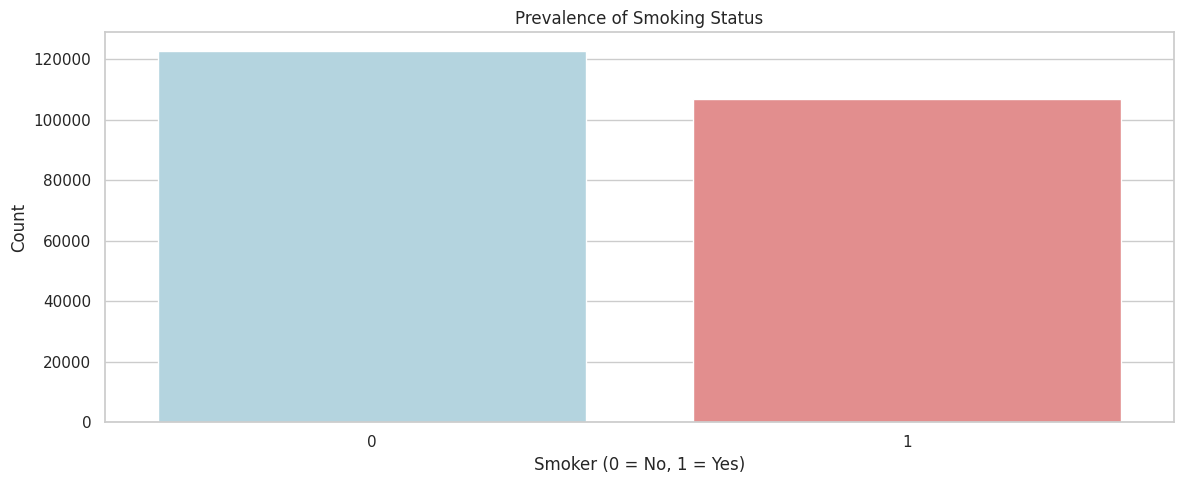

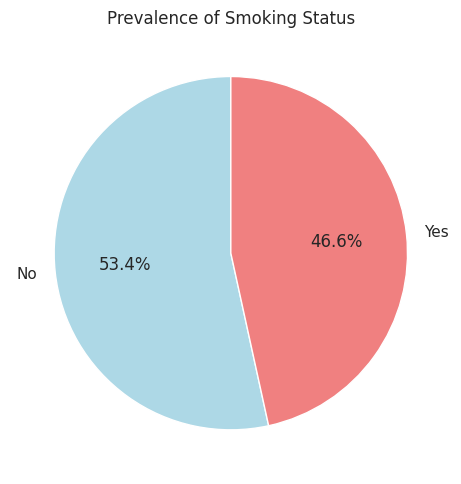

<ipython-input-15-e7da05fd6d86>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette=palette)


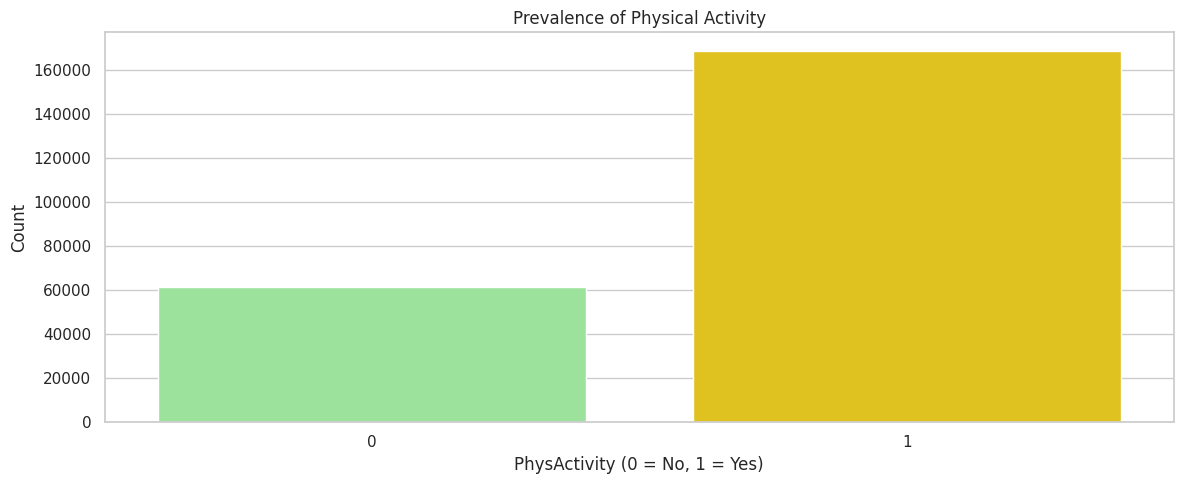

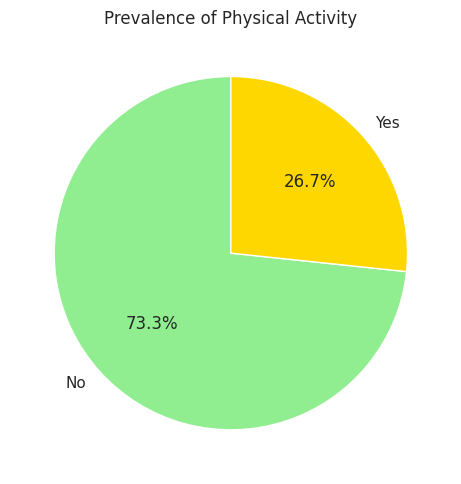

<ipython-input-15-e7da05fd6d86>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette=palette)


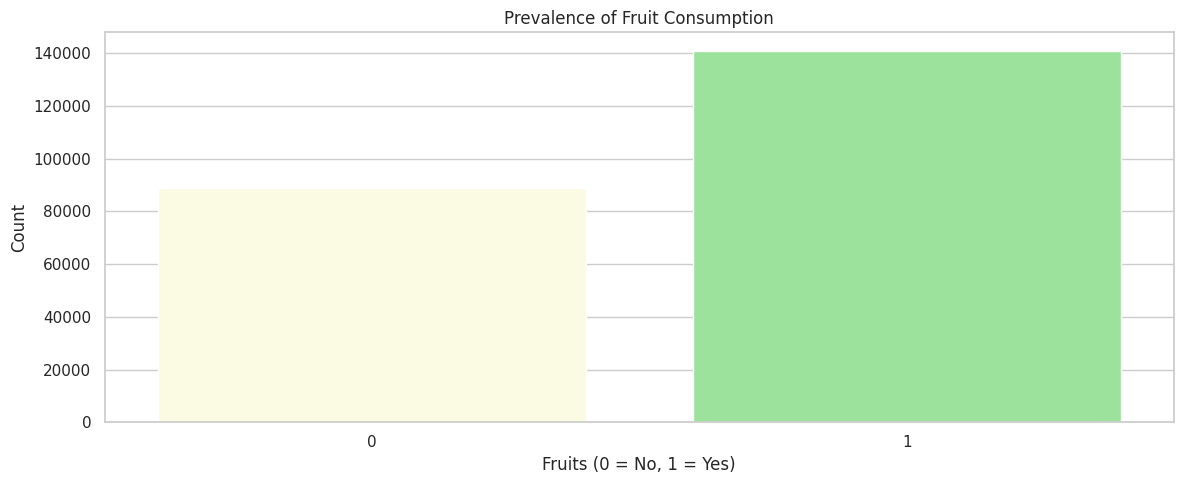

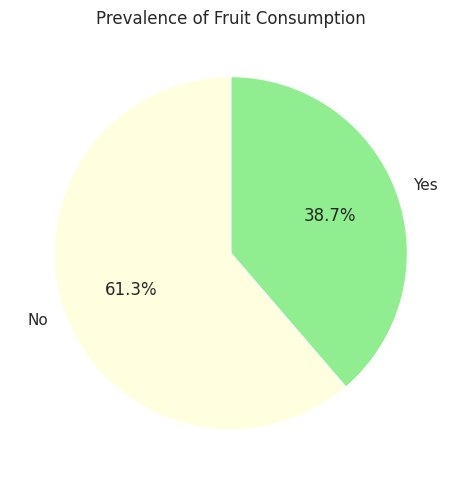

<ipython-input-15-e7da05fd6d86>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette=palette)


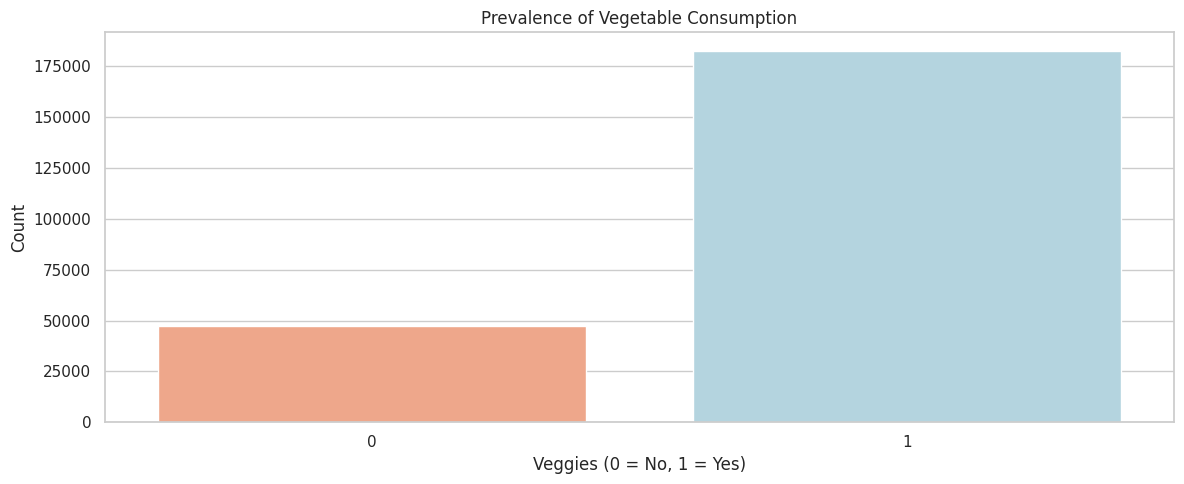

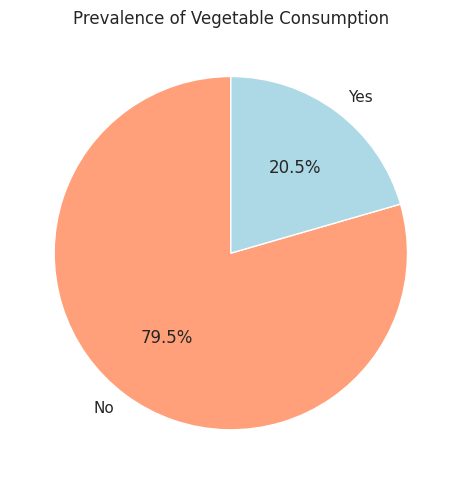

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the general style for the plots
sns.set(style="whitegrid")

# Create a function to plot categorical variables
def plot_categorical_distribution(df, variable, title, labels, palette):
    # Bar chart
    plt.figure(figsize=(12, 5))
    sns.countplot(x=variable, data=df, palette=palette)
    plt.title(title)
    plt.xlabel(f'{variable} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Pie chart
    plt.figure(figsize=(12, 5))
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', labels=labels, colors=palette, startangle=90)
    plt.title(title)
    plt.ylabel('')  # Hide y-label for aesthetic
    plt.tight_layout()
    plt.show()

# List of variables to plot
variables = {
    'Smoker': ('Prevalence of Smoking Status', ['No', 'Yes'], ['lightblue', 'lightcoral']),
    'PhysActivity': ('Prevalence of Physical Activity', ['No', 'Yes'], ['lightgreen', 'gold']),
    'Fruits': ('Prevalence of Fruit Consumption', ['No', 'Yes'], ['lightyellow', 'lightgreen']),
    'Veggies': ('Prevalence of Vegetable Consumption', ['No', 'Yes'], ['lightsalmon', 'lightblue'])
}

# Loop through the variables and plot
for var, (title, labels, palette) in variables.items():
    plot_categorical_distribution(df, var, title, labels, palette)


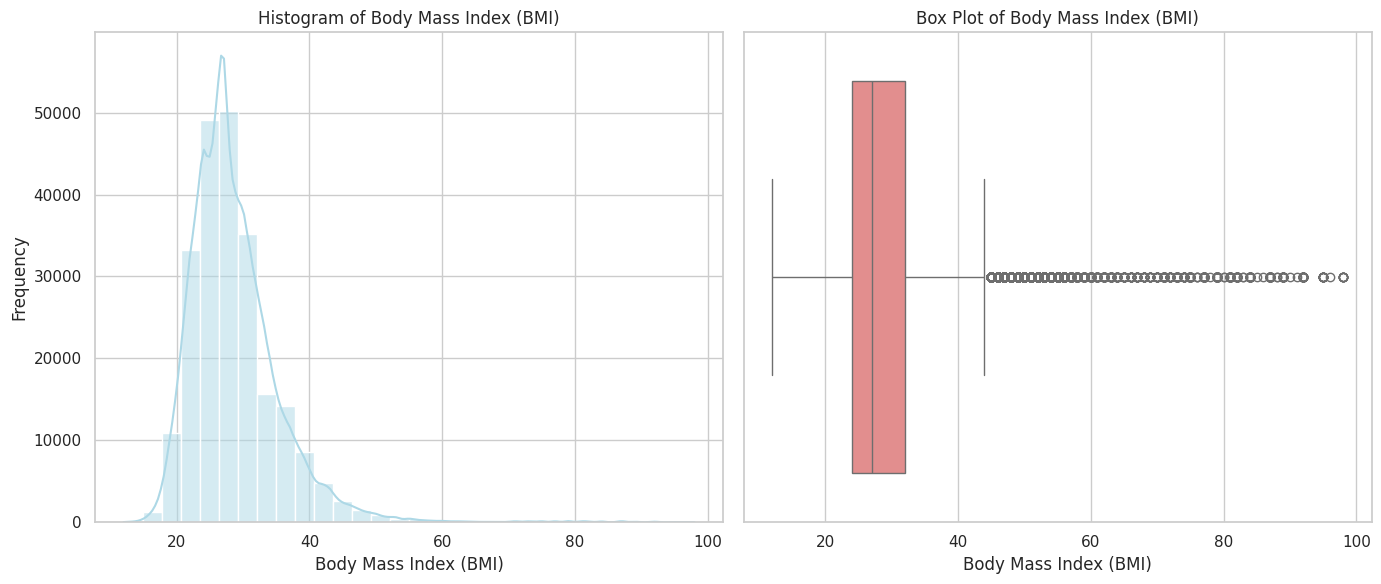

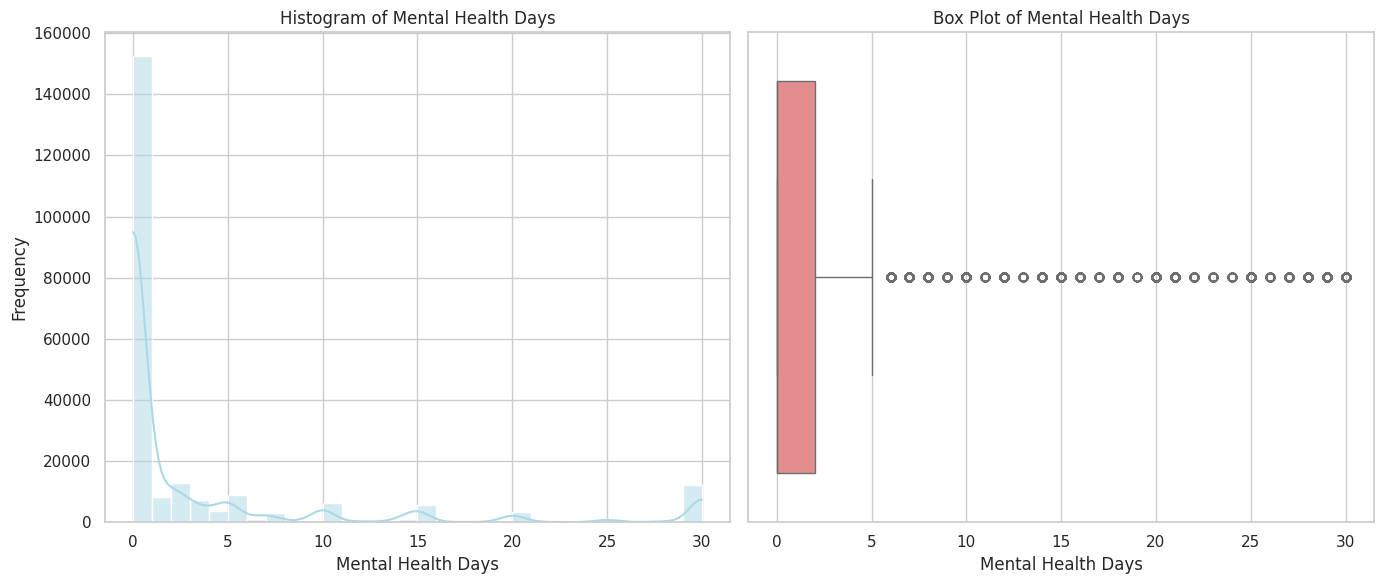

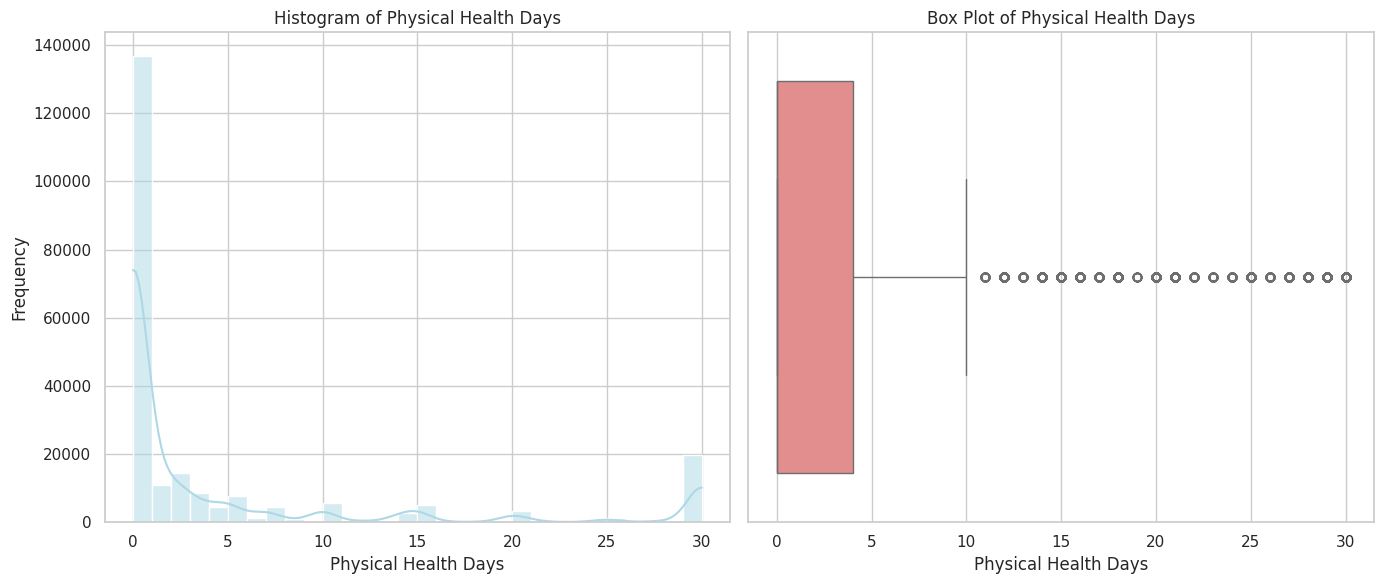

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the general style for the plots
sns.set(style="whitegrid")

# Create a function to plot histograms and box plots
def plot_continuous_distribution(df, variable, title):
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='lightblue')
    plt.title(f'Histogram of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable], color='lightcoral')
    plt.title(f'Box Plot of {title}')
    plt.xlabel(title)

    plt.tight_layout()
    plt.show()

# List of continuous variables to plot
continuous_variables = {
    'BMI': 'Body Mass Index (BMI)',
    'MentHlth': 'Mental Health Days', # Corrected the key from 'Menthlth' to 'MentHlth'
    'PhysHlth': 'Physical Health Days'
}

# Loop through the variables and plot
for var, title in continuous_variables.items():
    plot_continuous_distribution(df, var, title)
